In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
pheno = pd.read_csv("Phenotypic_V1_0b_preprocessed1.csv", index_col = 3, na_values= -9999)

In [4]:
y_data = pheno["SITE_ID"].unique()

In [5]:
pitt_age = pheno.loc[pheno["SITE_ID"] == "PITT"]["AGE_AT_SCAN"]
olin_age = pheno.loc[pheno["SITE_ID"] == "OLIN"]["AGE_AT_SCAN"]
oshu_age = pheno.loc[pheno["SITE_ID"] == "OHSU"]["AGE_AT_SCAN"]
sdsu_age = pheno.loc[pheno["SITE_ID"] == "SDSU"]["AGE_AT_SCAN"]
trinity_age = pheno.loc[pheno["SITE_ID"] == "TRINITY"]["AGE_AT_SCAN"]
um_1_age = pheno.loc[pheno["SITE_ID"] == "UM_1"]["AGE_AT_SCAN"]
um_2_age = pheno.loc[pheno["SITE_ID"] == "UM_2"]["AGE_AT_SCAN"]
usm_age = pheno.loc[pheno["SITE_ID"] == "USM"]["AGE_AT_SCAN"]
yale_age = pheno.loc[pheno["SITE_ID"] == "YALE"]["AGE_AT_SCAN"]
cmu_age = pheno.loc[pheno["SITE_ID"] == "CMU"]["AGE_AT_SCAN"]
leuven_1_age = pheno.loc[pheno["SITE_ID"] == "LEUVEN_1"]["AGE_AT_SCAN"]
leuven_2_age = pheno.loc[pheno["SITE_ID"] == "LEUVEN_2"]["AGE_AT_SCAN"]
kki_age = pheno.loc[pheno["SITE_ID"] == "KKI"]["AGE_AT_SCAN"]
nyu_age = pheno.loc[pheno["SITE_ID"] == "NYU"]["AGE_AT_SCAN"]
stanford_age = pheno.loc[pheno["SITE_ID"] == "STANFORD"]["AGE_AT_SCAN"]
ucla1_age = pheno.loc[pheno["SITE_ID"] == "UCLA_1"]["AGE_AT_SCAN"]
ucla2_age = pheno.loc[pheno["SITE_ID"] == "UCLA_2"]["AGE_AT_SCAN"]
maxmun_age = pheno.loc[pheno["SITE_ID"] == "MAX_MUN"]["AGE_AT_SCAN"]
caltech_age = pheno.loc[pheno["SITE_ID"] == "CALTECH"]["AGE_AT_SCAN"]
sbl_age = pheno.loc[pheno["SITE_ID"] == "SBL"]["AGE_AT_SCAN"]

x_data = [pitt_age, olin_age, oshu_age, sdsu_age, trinity_age, 
          um_1_age, um_2_age, usm_age, yale_age, cmu_age, leuven_1_age, 
          leuven_2_age, kki_age, nyu_age, stanford_age, ucla1_age, ucla2_age, 
          maxmun_age, caltech_age, sbl_age
         ] 

colors = ["aquamarine", "papayawhip", "fuchsia", "mintcream", "lightyellow",
         "deeppink", "chocolate", "darkorange", "lemonchiffon", "palevioletred", "paleturquoise", 
         "turquoise", "lightcyan", "lightgoldenrodyellow", "lime", "wheat", "mediumpurple",
          "chartreuse", "azure", "palevioletred"
         ] 


In [6]:
fig1 = go.Figure()
for xd, yd, cls in zip(x_data, y_data, colors):
    fig1.add_trace(go.Box(
        x = xd,
        name = yd,
        boxpoints = "all",
        jitter = 0.5,
        whiskerwidth = 0.2,
        marker_size = 2,
        line_width = 1,
        )
    )

fig1.update_layout(
    title = "Age at scan by site",
    yaxis = dict(
        autorange = True,
        showgrid = True,
        #zeroline = True,
        dtick = 1,
        gridcolor = "rgb(255, 255, 255)",
        gridwidth = 1,
        zerolinecolor = "rgb(255, 255, 255)",
        zerolinewidth = 5,
        ),
    xaxis = dict(
        autorange = True,
        showgrid = True,
        zeroline = True,
        dtick = 10,
        gridcolor = "rgb(255, 255, 255)",
        gridwidth = 1,
        zerolinecolor = "rgb(255, 255, 255)",
        zerolinewidth = 5,
        ),
    margin = dict(
        l = 100,
        r = 150,
        b = 80,
        t = 100,
        ),
    paper_bgcolor = "rgb(243, 243, 243)",
    plot_bgcolor = "rgb(243, 243, 243)",
    showlegend = True,
    width = 1200,
    height = 900,
    )
    
fig1.show()
    


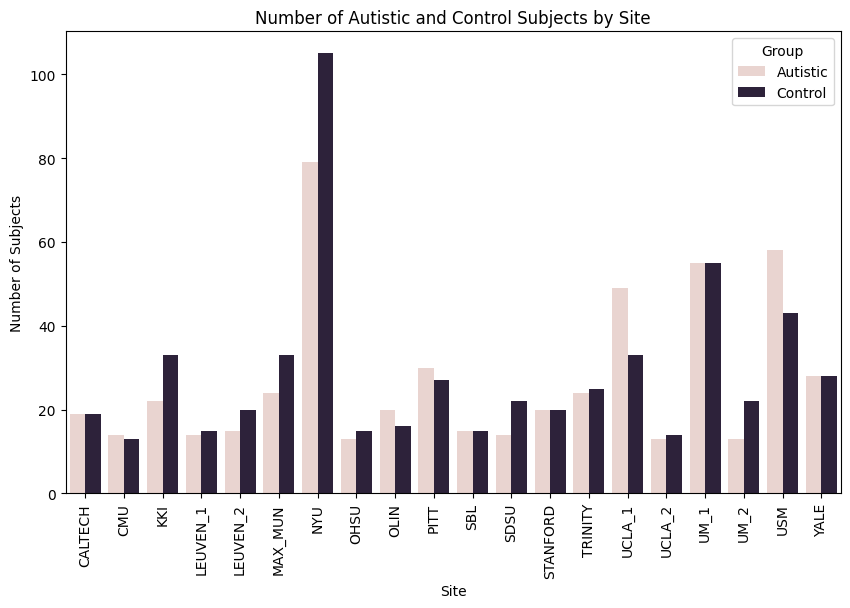

In [7]:
grouped_by_site = pheno.groupby(['SITE_ID', 'DX_GROUP']).size().reset_index(name='counts')
# Create a bar plot


plt.figure(figsize=(10, 6))
sns.barplot(x='SITE_ID', y='counts', hue='DX_GROUP', data=grouped_by_site)
plt.title('Number of Autistic and Control Subjects by Site')
plt.xlabel('Site')
plt.ylabel('Number of Subjects')
plt.xticks(rotation=90) 

handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(title='Group', labels=['Autistic', 'Control'], handles=handles)
plt.show()

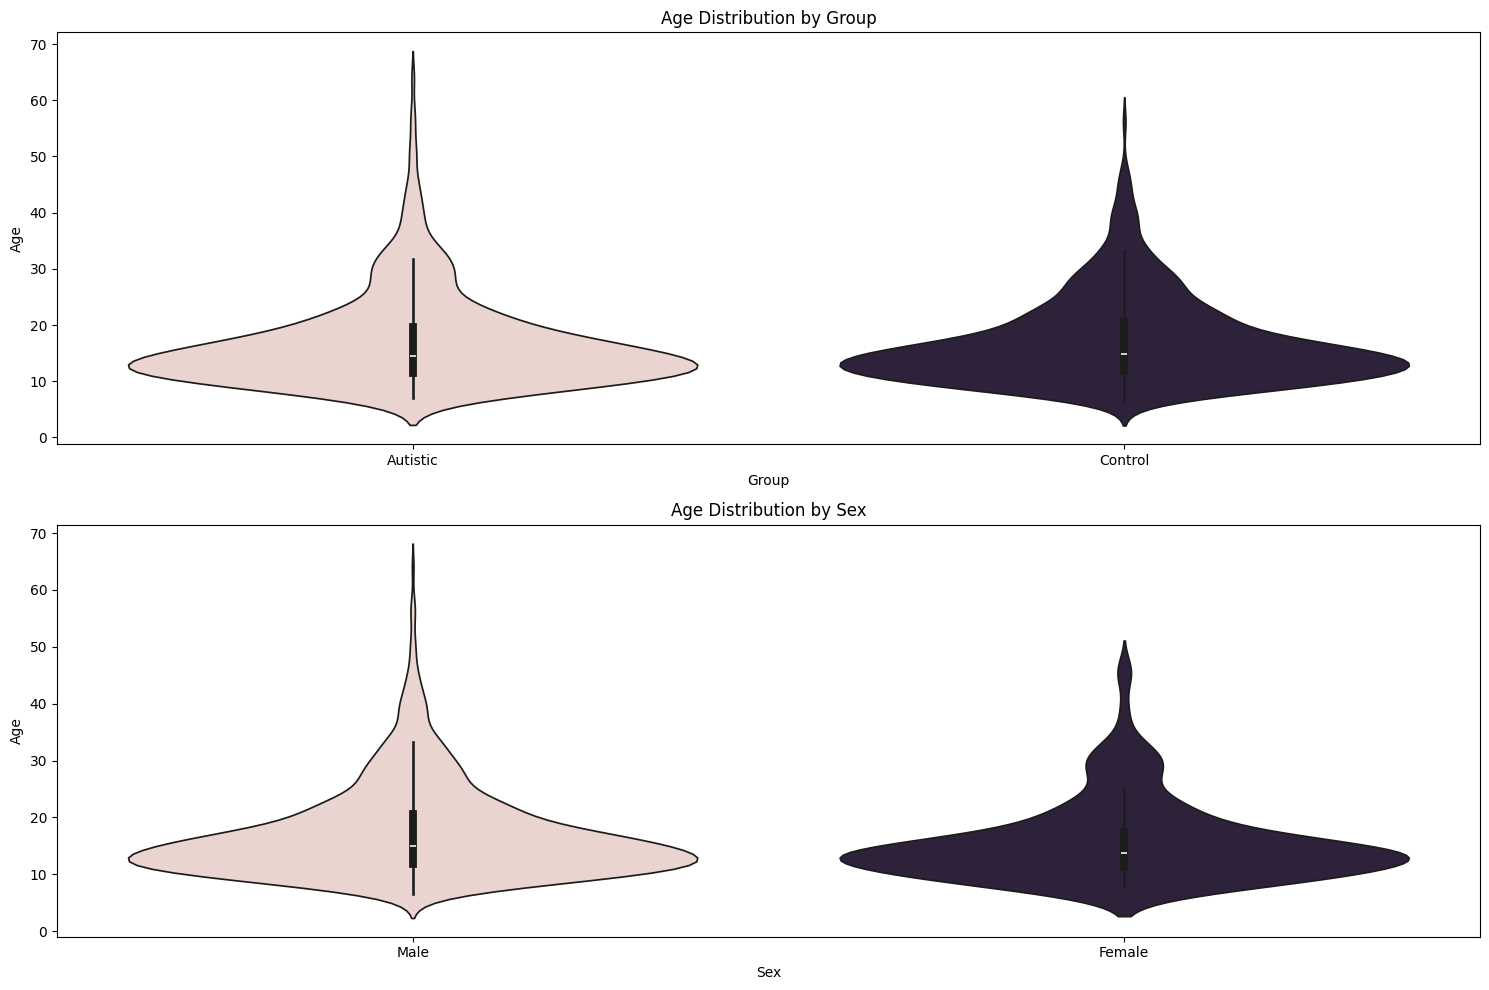

In [8]:
# Create a figure with 2 subplots
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

# Create the first subplot for age distribution by group
sns.violinplot(x='DX_GROUP', y='AGE_AT_SCAN', data=pheno, hue='DX_GROUP', ax=axs[0])
axs[0].set_title('Age Distribution by Group')
axs[0].set_xlabel('Group')
axs[0].set_ylabel('Age')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Autistic', 'Control'])
axs[0].get_legend().remove()

# Create the second subplot for age distribution by sex
# Assuming 'SEX' is the column with sex data (1 for Male, 2 for Female)
sns.violinplot(x='SEX', y='AGE_AT_SCAN', data=pheno, hue='SEX', ax=axs[1])
axs[1].set_title('Age Distribution by Sex')
axs[1].set_xlabel('Sex')
axs[1].set_ylabel('Age')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['Male', 'Female'])
axs[1].get_legend().remove()

plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Assuming df is your DataFrame
grouped = pheno.groupby('SITE_ID').agg({
    'AGE_AT_SCAN': ['min', 'max']
})

dx_group_counts = pheno.groupby(['SITE_ID', 'DX_GROUP']).size().unstack(fill_value=0)
sex_counts = pheno.groupby(['SITE_ID', 'SEX']).size().unstack(fill_value=0)

# Combine the dataframes
grouped = pd.concat([grouped, dx_group_counts, sex_counts], axis=1)

# To write the grouped data into a new DataFrame
new_df = pd.DataFrame(grouped)

# To write the new DataFrame to a CSV file
new_df.to_csv('grouped_data.csv')

new_df


,"(AGE_AT_SCAN, min)","(AGE_AT_SCAN, max)",1,2,1,2
SITE_ID,,,,,,
CALTECH,17.0000,56.2000,19,19,30,8
CMU,19.0000,40.0000,14,13,21,6
KKI,8.0700,12.7700,22,33,42,13
LEUVEN_1,18.0000,32.0000,14,15,29,0
LEUVEN_2,12.1000,16.9000,15,20,27,8
MAX_MUN,7.0000,58.0000,24,33,50,7
NYU,6.4700,39.1000,79,105,147,37
OHSU,8.0000,15.2300,13,15,28,0
OLIN,10.0000,24.0000,20,16,31,5
